In [2]:
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts
import scipy. integrate as intr
import seaborn
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pprint import pprint
max_line_width=np.inf
from scipy import linalg 

Problem 1

In [3]:
def simple_newton1(f,x_0,df,maxiter =15,tol =1e-5):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - f(x_0)/df(x_0)
        error = np.abs(x_1-x_0)
        x_0 = x_1
        iter_1 += 1
    return x_1,error<= tol,iter_1

g1  = lambda x: x**4-3
dg1 =  lambda x: 4*x**3

g2  = lambda x: np.exp(x)-2
dg2 =  lambda x: np.exp(x)

simple_newton1(g1,3,dg1,20,1e-6)
simple_newton1(g2,3,dg2,20,1e-6)

(1.3160740129525732, True, 7)

(0.6931471805599454, True, 7)

Problem 2

In [4]:
def solve_bank(N1,N2,P1,P2):
    maxiter =100
    tol = 1e-7
    iter_1 =0
    error =10
    r_0 = 0.1
    while error >tol and iter_1<maxiter:
        r_1 = r_0 - g(N1,N2,P1,P2,r_0)/dg(N1,N2,P1,P2,r_0,1e-6)
        error = np.abs(r_1-r_0)
        r_0 = r_1
        iter_1 += 1
    return r_1

g  = lambda n1,n2,p1,p2,r: p1*((1+r)**n1-1)-p2*(1-(1+r)**-n2)
dg = lambda n1,n2,p1,p2,r,h:(g(n1,n2,p1,p2,r+h)-g(n1,n2,p1,p2,r))/h

solve_bank(30,20,2000,8000)

0.03877843202968209

Problem 3

In [5]:
def simple_newton2(f,x_0,df,maxiter,tol,α):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - α*f(x_0)/df(x_0)
        error = np.abs(x_1-x_0)
        x_0 = x_1
        iter_1 += 1
    return np.array([x_1,error<= tol,iter_1])

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
df = lambda x: 1./3 * np.power(np.abs(x), -2/3)

simple_newton2(f,.01,df,20,1e-5,1.0)
simple_newton2(f,.01,df,20,1e-5,0.4)  

array([10485.76,     0.  ,    20.  ])

array([6.4e-07, 1.0e+00, 6.0e+00])

Problem 4

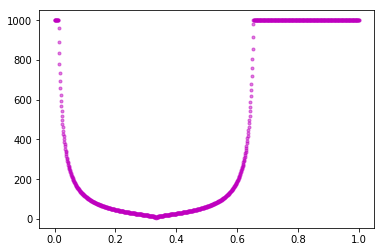

In [6]:
def opt_alpha(f,x_0,df,maxiter,tol):
    α = np.linspace(1e-5,1.000001,1000)
    iter_stop = np.zeros(len(α))
    for i in range(len(α)):
        iter_stop[i] = simple_newton2(f,x_0,df,maxiter,tol,α[i])[2]
    plt.plot(α,iter_stop,'m.', alpha =0.5)
    
opt_alpha(f,.01,df,1000,1e-20)

Problem 5

In [7]:
g1  = lambda x: np.array([x[0]**4 +x[1]**3 -3,x[0]**3 +x[1]**4 -3])
g2 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
g3  = lambda x: x**4-3
# dg1 = lambda x: 1./3 * np.power(np.abs(x), -2/3)



def jacobian(func,x_vec):
    h = .0001
    m =  func(x_vec).shape[0]
    n= len(x_vec)
    basis =  np.eye(n)
    jac = np.zeros((m,n))
    for j in range(n):
        jac[:,j] = (2*h)**-1*(func(x_vec+ h*basis[:,j])-func(x_vec- h*basis[:,j]))
    return jac

jacobian(g1,np.array([1,2]))

def simple_newton4(f,x_vec,maxiter,tol,α):
    iter_1 =0
    error =10
    if np.isscalar(f):
        return simple_newton2(f,x_vec,jacobian(f,x_vec),maxiter,tol,α)
    else:
        while error >tol and iter_1<maxiter:
            x_1 = x_vec - α*linalg.solve(jacobian(f,x_vec), f(x_vec))
            error = linalg.norm(x_1-x_vec,2)
            x_vec = x_1
            iter_1 += 1
    return x_1,error<= tol,iter_1

simple_newton4(g3,np.array([1]),200,1e-6,.5)

array([[ 4.00000004, 12.00000001],
       [ 3.00000001, 32.00000008]])

(array([1.31607315]), True, 17)

Problem 6

In [8]:
f = lambda x: anp.array([5*x[0]*x[1] - x[0]*(1 + x[1]), -x[0]*x[1] + (1 - x[1])*(1 + x[1])])
Df = jacobian(f,np.array([1,1]))

def find_init(f, Df, niter=100):
    # Create search domain
    x_domain = np.linspace(-0.25, 0, 100)
    y_domain = np.linspace(0, 0.25, 100)
    X, Y = np.meshgrid(x_domain, y_domain)
    xy_domain = zip(X.ravel(), Y.ravel())
    
    # See where each point in the domain converges
    for coord in xy_domain:
        try:
            min1 = simple_newton4(anp.array(coord), f, Df, alpha=1, maxiter=niter)
            min2 = simple_newton4(anp.array(coord), f, Df, alpha=0.55, maxiter=niter)
            if (np.allclose(min1, anp.array((0, 1))) or np.allclose(min1, anp.array((0, -1)))) and np.allclose(min2, anp.array((3.75, 0.25))):
                return coord
        except:
            pass

print(find_init(f, Df))

None


Problem 7

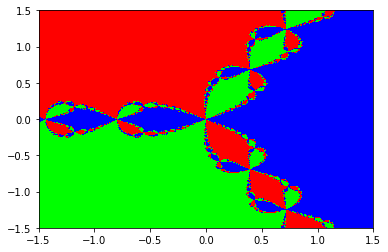

In [9]:
def simple_newton1(f,x_0,df,maxiter =15,tol =1e-5):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - f(x_0)/df(x_0)
        error = linalg.norm(x_1-x_0,2)
        x_0 = x_1
        iter_1 += 1
    return x_1,error<= tol,iter_1

g1  = lambda x: x**3-1
dg1 =  lambda x: 3*x**2 ## 6.5.7
g2  = lambda x: x**3-x
dg2 =  lambda x: 3*x**2 -1 ## 6.5.7
zeros1 = np.array([1 + 1j*0., -0.5+ 1j*np.sqrt(3),-0.5- 1j*np.sqrt(3)])
zeros2 = np.array([0 + 1j*0., -1+ 1j*0.,1+1j*0.])


def plot_newton_frac(F,Df,zeros,bounds,res,iters):
    rmin,rmax,imin,imax = bounds[0],bounds[1],bounds[2],bounds[3]
    x = np.linspace(rmin,rmax,res)
    y = np.linspace(imin,imax,res)
    z_real,z_im = np.meshgrid(x,y)
    z_0 = z_real + 1j*z_im
    for i in range(iters):
        z_k =  z_0 - F(z_0)/Df(z_0)
        z_0 = z_k
    Y = np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            Y[i,j] = np.argmin(np.abs(zeros - z_0[i, j]))
    plt.pcolormesh(z_real, z_im, Y, cmap='brg')
    plt.show()
    return


plot_newton_frac(g1,dg1,zeros1,np.array([-1.5,1.5,-1.5,1.5]),500,500)